# SPRINT 2


# TEAM ID:PNT2022TMID33847

# DATA PREPROCESSING

In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XNAHB8gqTz5Og1dVCmQJsJlIS__c1nS5AOKa4CMYXYyf',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphishingdetection-donotdelete-pr-1yermjhjak5stv'
object_key = 'dataset_website.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [2]:
## import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [3]:
df.shape

(11055, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

# Checking null values

In [5]:
df.isnull().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

# No Null Values

In [6]:
df.Prefix_Suffix.value_counts()

-1    9590
 1    1465
Name: Prefix_Suffix, dtype: int64

In [7]:
df.Result.value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [8]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# UNIVARIATE ANALYSIS

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Google_Index', ylabel='Density'>

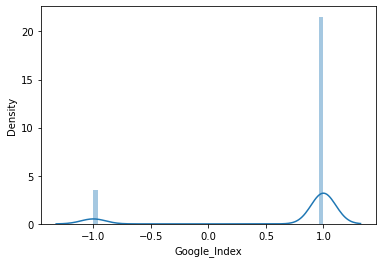

In [9]:
sns.distplot(df.Google_Index) # univariate analysis

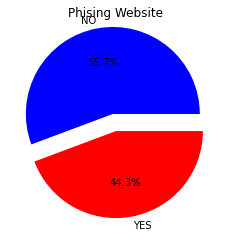

In [10]:
plt.pie(df.Result.value_counts(),[0.2,0],colors=['blue','red'],labels=['NO','YES'],autopct="%1.1f%%")
plt.title('Phising Website')
plt.show()

<AxesSubplot:xlabel='Iframe', ylabel='Count'>

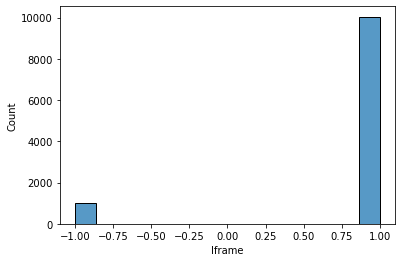

In [11]:
sns.histplot(df.Iframe)

# BIVARIATE ANALYSIS

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Google_Index', ylabel='Result'>

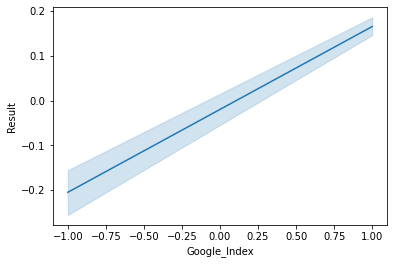

In [12]:
sns.lineplot(df.Google_Index,df.Result)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Iframe', ylabel='Result'>

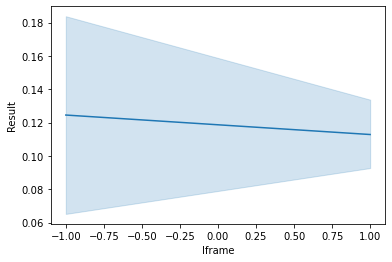

In [13]:
sns.lineplot(df.Iframe,df.Result)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Iframe', ylabel='Result'>

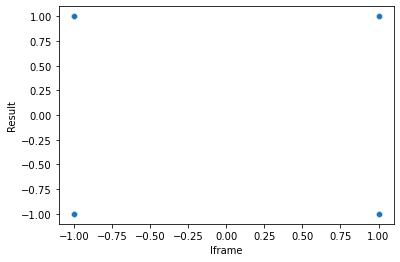

In [14]:
sns.scatterplot(df.Iframe,df.Result)

# MULTIVARIATE ANALYSIS

<AxesSubplot:>

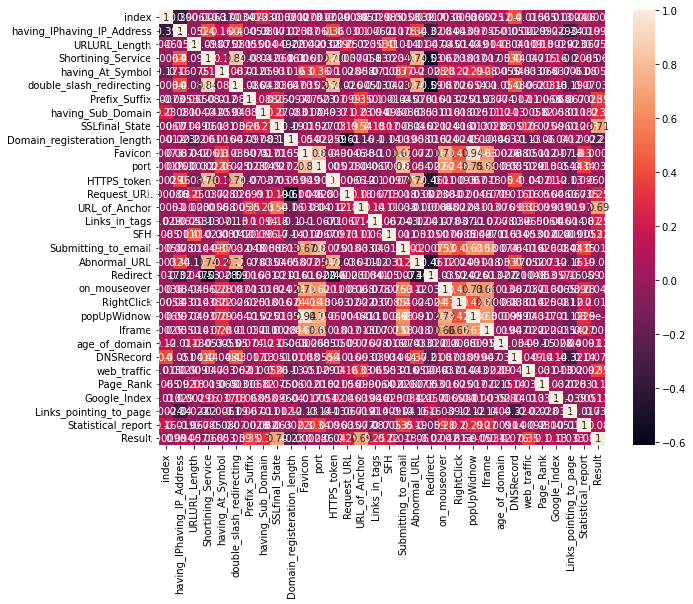

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Outlier Detection

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Links_in_tags'>

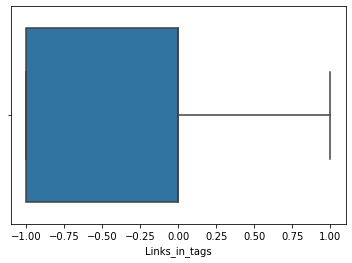

In [15]:
sns.boxplot(df.Links_in_tags )

# No Outliers

# Multicollinearity

In [16]:
df.corr().Result.sort_values(ascending=False)

Result                         1.000000
SSLfinal_State                 0.714741
URL_of_Anchor                  0.692935
Prefix_Suffix                  0.348606
web_traffic                    0.346103
having_Sub_Domain              0.298323
Request_URL                    0.253372
Links_in_tags                  0.248229
SFH                            0.221419
Google_Index                   0.128950
age_of_domain                  0.121496
Page_Rank                      0.104645
having_IPhaving_IP_Address     0.094160
Statistical_report             0.079857
DNSRecord                      0.075718
URLURL_Length                  0.057430
having_At_Symbol               0.052948
on_mouseover                   0.041838
port                           0.036419
Links_pointing_to_page         0.032574
Submitting_to_email            0.018249
RightClick                     0.012653
index                          0.000978
popUpWidnow                    0.000086
Favicon                       -0.000280


# X and y split

In [17]:
# independent varibles-X

X=df.drop(columns=['Result'],axis=1)
X.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [18]:
# y target-dependent variable


y=df.Result
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [19]:
X.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1


# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.3,random_state=0)

In [21]:
X_train

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
9491,9492,-1,-1,1,1,1,1,-1,1,1,...,1,1,1,1,1,1,-1,1,1,1
7795,7796,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,-1,1,0,1,1,-1,1
6577,6578,-1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,1,0,1,1,1,1
4804,4805,1,-1,1,1,1,-1,-1,-1,-1,...,1,-1,-1,1,1,0,-1,1,1,-1
3812,3813,1,-1,1,1,1,-1,0,-1,-1,...,1,1,1,-1,-1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,4860,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,-1,-1,-1,1,1,1
3264,3265,1,-1,1,1,1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,-1,1,1
9845,9846,-1,1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,0,1,1,1,1
10799,10800,-1,-1,1,1,1,-1,-1,0,-1,...,1,1,1,1,1,0,-1,1,1,1


In [22]:
X_train.shape

(7738, 31)

In [23]:
y_train.shape

(7738,)

In [24]:
X_test

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
226,227,1,-1,1,1,1,-1,-1,1,1,...,1,-1,1,-1,-1,-1,-1,1,0,1
2252,2253,1,-1,1,1,1,-1,0,-1,-1,...,1,1,1,-1,1,-1,-1,1,0,1
2646,2647,1,-1,1,1,1,-1,0,1,-1,...,1,1,1,1,-1,1,-1,1,1,1
6444,6445,1,-1,1,1,1,-1,0,-1,-1,...,1,1,1,-1,1,1,-1,1,0,1
1387,1388,1,-1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8012,8013,1,-1,1,-1,1,-1,1,0,1,...,-1,-1,-1,-1,1,-1,-1,1,0,1
6964,6965,-1,-1,1,1,1,-1,1,1,-1,...,1,-1,1,-1,1,1,1,1,0,1
3980,3981,1,-1,1,1,1,-1,0,0,-1,...,1,1,1,1,-1,0,-1,1,0,1
3771,3772,1,1,1,1,1,-1,1,1,-1,...,-1,-1,-1,1,1,0,-1,1,1,-1


In [25]:
X_test.shape

(3317, 31)

# MODEL BUILDING

# Logistic Regression

In [101]:
# model building

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
test_pred= lr.predict(X_test)
test_pred

array([-1, -1,  1, ..., -1,  1,  1])

In [28]:
train_pred = lr.predict(X_train)
train_pred

array([ 1,  1, -1, ...,  1, -1,  1])

# Evaluation Metrics

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [30]:
pd.crosstab(y_test,test_pred)

col_0,-1,1
Result,,
-1,1341,157
1,106,1713


In [31]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          -1       0.93      0.90      0.91      1498
           1       0.92      0.94      0.93      1819

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



# Random Forest Classifier Algorithm

In [32]:
# model building 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=15,max_depth=3)

In [33]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=15)

In [34]:
test_pred = rf.predict(X_test)

In [35]:
train_pred = rf.predict(X_train)

# EVALUATION METRICS

In [36]:
# evaluating the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
print('Testing accuracy: ' , accuracy_score(y_test,test_pred))
print('Training accuracy: ',accuracy_score(y_train,train_pred))

Testing accuracy:  0.9210129635212542
Training accuracy:  0.9198759369346085


In [38]:
pd.crosstab(y_test,test_pred)

col_0,-1,1
Result,,
-1,1335,163
1,99,1720


In [39]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          -1       0.93      0.89      0.91      1498
           1       0.91      0.95      0.93      1819

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



# Decision Tree Algorithm

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)

In [41]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
train_pred = dt.predict(X_train)
train_pred

array([ 1,  1,  1, ...,  1, -1, -1])

In [43]:
test_pred = dt.predict(X_test)
test_pred

array([-1, -1,  1, ..., -1,  1,  1])

# Evaluation Metrics

In [44]:
print('Training accuracy : ',accuracy_score(y_train,train_pred))
print('Testing accuracy : ',accuracy_score(y_test,test_pred))

Training accuracy :  0.9078573274747996
Testing accuracy :  0.9071450105517034


In [45]:
pd.crosstab(y_test,test_pred)

col_0,-1,1
Result,,
-1,1225,273
1,35,1784


In [46]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          -1       0.97      0.82      0.89      1498
           1       0.87      0.98      0.92      1819

    accuracy                           0.91      3317
   macro avg       0.92      0.90      0.90      3317
weighted avg       0.91      0.91      0.91      3317



# KMeans Classifier Algorithm

In [47]:
# Model building
from sklearn.neighbors import KNeighborsClassifier
kn =KNeighborsClassifier()

In [48]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred = kn.predict(X_test)
y_pred

array([ 1,  1, -1, ...,  1, -1,  1])

In [50]:
y_pred1 = kn.predict(X_train)
y_pred1

array([-1,  1,  1, ...,  1,  1,  1])

# Evaluation Metrics

In [51]:
# model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(y_train,y_pred1))
print('Testing accuracy: ',accuracy_score(y_test,y_pred))

Training accuracy:  0.7629878521581804
Testing accuracy:  0.5936086825444679


In [52]:
pd.crosstab(y_test,y_pred)

col_0,-1,1
Result,,
-1,757,741
1,607,1212


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.55      0.51      0.53      1498
           1       0.62      0.67      0.64      1819

    accuracy                           0.59      3317
   macro avg       0.59      0.59      0.59      3317
weighted avg       0.59      0.59      0.59      3317



# Naive Baye's Algorithm

In [54]:
# model building
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [55]:
nb.fit(X_train,y_train)

GaussianNB()

In [56]:
pred_test = nb.predict(X_test)

In [58]:
pred_train = nb.predict(X_train)

# Evaluation Metrics

In [59]:
# model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
print('Training accuracy: ', accuracy_score(y_train,pred_train))
print('Testing accuracy: ', accuracy_score(y_test,pred_test))

Training accuracy:  0.889894029464978
Testing accuracy:  0.8860416038589086


In [61]:
pd.crosstab(y_test,pred_test)

col_0,-1,1
Result,,
-1,1404,94
1,284,1535


In [62]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

          -1       0.83      0.94      0.88      1498
           1       0.94      0.84      0.89      1819

    accuracy                           0.89      3317
   macro avg       0.89      0.89      0.89      3317
weighted avg       0.89      0.89      0.89      3317



# Comparing all the algorithms using boxplot

In [63]:
from sklearn import model_selection

LR: 0.920940 (0.010206)
DC: 0.943639 (0.021847)
RF: 0.969965 (0.009137)
KNN: 0.505650 (0.040922)
NB: 0.879880 (0.019054)


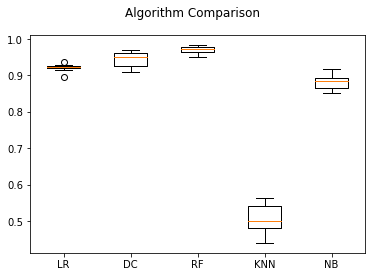

In [66]:
import warnings
warnings.filterwarnings('ignore')
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None )
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# FROM BOX PLOT RESULTS IT IS CLEAR THAT 'RANDOM FOREST CLASSIFIER' HAS THE GREATEST ACCURACY. 'RANDOM FOREST CLASSIFIER' ALGORITHM IS THE BEST MACHINE LEARNING ALGORITHM. FITTING THE BEST MODEL.

# IBM DEPLOYMENT

In [67]:
!pip install -U ibm-watson-machine-learning

In [68]:
from ibm_watson_machine_learning import APIClient
import json

# Authenticate and set space

In [71]:
wml_credentials = {

"apikey":"OE-QJR_dqYubToiS8a2z_bokArc9V_t10jO1Pf0pja46",

"url":"https://us-south.ml.cloud.ibm.com"

}

In [72]:
wml_client =APIClient(wml_credentials)

In [74]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------  ------------------------
ID                                    NAME         CREATED
cd402e7b-9704-45c0-b336-d8eef8c62e99  webphishing  2022-11-15T08:59:28.281Z
------------------------------------  -----------  ------------------------


In [75]:
SPACE_ID="cd402e7b-9704-45c0-b336-d8eef8c62e99"

In [77]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [78]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

# Save and Deploy the model

In [81]:
import sklearn 
sklearn.__version__

'1.0.2'

In [82]:
MODEL_NAME = 'Web Phishing Detection' 
DEPLOYMENT_NAME = 'webphishing' 
DEMO_MODEL = rf

In [85]:
# Set Python Version 
software_spec_uid= wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [89]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [94]:
#Save model

model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [95]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Result',
  'schemas': {'input': [{'fields': [{'name': 'index', 'type': 'int64'},
      {'name': 'having_IPhaving_IP_Address', 'type': 'int64'},
      {'name': 'URLURL_Length', 'type': 'int64'},
      {'name': 'Shortining_Service', 'type': 'int64'},
      {'name': 'having_At_Symbol', 'type': 'int64'},
      {'name': 'double_slash_redirecting', 'type': 'int64'},
      {'name': 'Prefix_Suffix', 'type': 'int64'},
      {'name': 'having_Sub_Domain', 'type': 'int64'},
      {'name': 'SSLfinal_State', 'type': 'int64'},
      {'name': 'Domain_registeration_length', 'type': 'int64'},
      {'name': 'Favicon', 'type': 'int64'},
      {'name': 'port', 'type': 'int64'},
      {'name': 'HTTPS_token', 'type': 'int64'},
      {'name': 'Request_URL', 'type': 'int64'},
      {'name': 'URL_of_Anchor', 'type': 'int64'},
      {'name': 'Links_in_tags', 'type': 'int64'},
      {'name': 'SFH', 'type': 'int64'},
      {'name': 'Submitting_t

In [96]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'1729d1ac-255d-476b-9d2f-092a41d5fb70'

In [98]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [99]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '1729d1ac-255d-476b-9d2f-092a41d5fb70' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6f7bccf6-607f-4ac4-9ab3-faa25e15cca6'
------------------------------------------------------------------------------------------------


